# <font color='blue'>Module 5 - CCPS 844 Data Mining</font>

# K Means Clustering

It is a type of unsupervised algorithm which  solves the clustering problem. Its procedure follows a simple and easy  way to classify a given data set through a certain number of  clusters (assume k clusters). Data points inside a cluster are homogeneous and heterogeneous to peer groups.

### Implementing K-means Clustering
K-means clustering is a clustering algorithm that aims to partition n observations into k clusters.

There are 3 steps:

* Initialisation – K initial “means” (centroids) are generated at random
* Assignment – K clusters are created by associating each observation with the nearest centroid
* Update – The centroid of the clusters becomes the new mean

http://benalexkeen.com/k-means-clustering-in-python/

{1: [26, 16], 2: [68, 42], 3: [55, 76]}


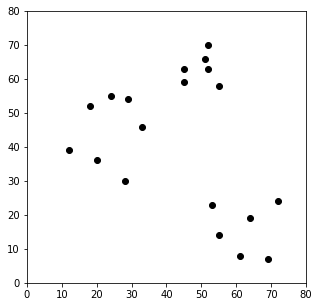

In [1]:
## Initialisation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.DataFrame({
    'x': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
    'y': [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24]
})


np.random.seed(200)
k = 3
# centroids[i] = [x, y]
centroids = {
    i+1: [np.random.randint(0, 80), np.random.randint(0, 80)]
    for i in range(k)
}
#print randomly generated centeroids
print(centroids)    
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color='k')
#colmap = {1: 'r', 2: 'g', 3: 'b'}
#for i in centroids.keys():
#    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

{1: [26, 16], 2: [68, 42], 3: [55, 76]}


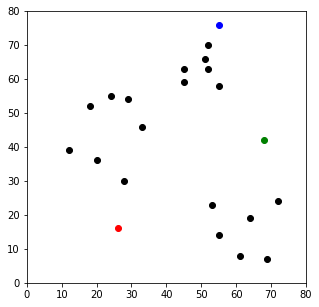

In [2]:
## Initialisation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.DataFrame({
    'x': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
    'y': [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24]
})


np.random.seed(200)
k = 3
# centroids[i] = [x, y]
centroids = {
    i+1: [np.random.randint(0, 80), np.random.randint(0, 80)]
    for i in range(k)
}
#print randomly generated centeroids
print(centroids)    
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color='k')
colmap = {1: 'r', 2: 'g', 3: 'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

    x   y  distance_from_1  distance_from_2  distance_from_3  closest color
0  12  39        26.925824        56.080300        56.727418        1     r
1  20  36        20.880613        48.373546        53.150729        1     r
2  28  30        14.142136        41.761226        53.338541        1     r
3  18  52        36.878178        50.990195        44.102154        1     r
4  29  54        38.118237        40.804412        34.058773        3     b


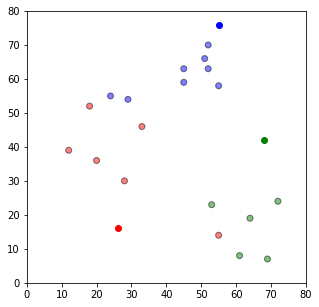

In [3]:
## Assignment Stage

def assignment(df, centroids):
    for i in centroids.keys():
        # sqrt((x1 - x2)^2 - (y1 - y2)^2)
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['x'] - centroids[i][0]) ** 2
                + (df['y'] - centroids[i][1]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df

df = assignment(df, centroids)
print(df.head())

fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

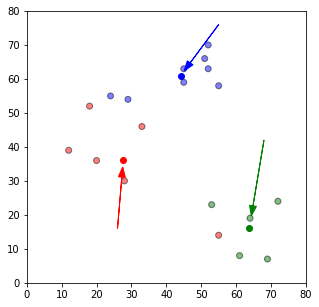

In [4]:
## Update Stage

import copy

old_centroids = copy.deepcopy(centroids)

def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
    return k

centroids = update(centroids)
    
fig = plt.figure(figsize=(5, 5))
ax = plt.axes()
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
for i in old_centroids.keys():
    old_x = old_centroids[i][0]
    old_y = old_centroids[i][1]
    dx = (centroids[i][0] - old_centroids[i][0]) * 0.75
    dy = (centroids[i][1] - old_centroids[i][1]) * 0.75
    ax.arrow(old_x, old_y, dx, dy, head_width=2, head_length=3, fc=colmap[i], ec=colmap[i])
plt.show()

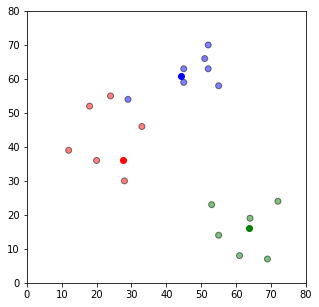

In [5]:
## Repeat Assigment Stage

df = assignment(df, centroids)

# Plot results
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

Note that: 
* one of the reds is now green and one of the blues is now red.

We are getting closer.
* repeat until there are no changes to any of the clusters.

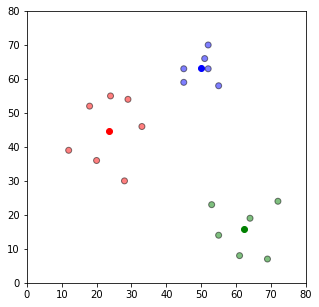

In [6]:
# Continue until all assigned categories don't change any more
while True:
    closest_centroids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    df = assignment(df, centroids)
    if closest_centroids.equals(df['closest']):
        break

fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

** We have 3 clear clusters with 3 means at the centre of these clusters.**

# K Means with sklearn

In [7]:
import seaborn as sns
import sklearn.datasets
import matplotlib.pyplot as plt
%matplotlib inline

## Create some Data using sklearn.datasets.make_blobs
Both make_blobs and make_classification create multiclass datasets by allocating each class one or more normally-distributed clusters of points.  
http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html  
https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.scatter.html

In [8]:
# Creating random Data for clustering
#dataClusters=sklearn.datasets.make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=1.0, 
#                           center_box=(-10.0, 10.0), shuffle=True, random_state=None)

# Use the following, if you want to regenrate the same data, every time you run the program by setting random_state=322
dataClusters=sklearn.datasets.make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=1.0,  
                            center_box=(-10.0, 10.0), shuffle=True, random_state=322)
#Genarate 100 data points with two features (e.g. a point x,y n_features=3 means three features mean a data point(x,y,z)). 
#Here we have created 2 dimensional data

In [9]:
#each number (0,1,2) shows to which cluster a data point belongs
print(dataClusters[1])
#dataClusters[1], if you want to see all data point

[0 1 2 0 1 1 0 1 2 2 1 2 0 2 0 1 1 1 2 2 0 2 0 1 0 1 0 0 2 0 0 2 1 0 2 0 1
 1 0 2 2 2 1 1 2 0 1 2 1 0 2 0 1 0 2 2 2 1 0 0 2 1 1 1 2 0 1 0 1 1 2 0 2 2
 0 0 2 1 0 1 0 0 2 1 2 2 1 0 1 1 2 2 2 0 0 1 1 2 0 0]


**Inorder to visualise the data we will plot the data by using the matplotlib.pyplot library**

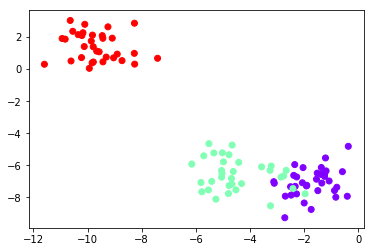

In [10]:
plt.scatter(dataClusters[0][:,0],dataClusters[0][:,1],c=dataClusters[1],cmap='rainbow')

## Learning with KMeans Algorithm from sklearn.cluster.KMeans library to create Clusters  
http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [11]:
from sklearn.cluster import KMeans
#n_clusters --- Number of clusters that we are looking for
#Change number of clusters to see how they change the results
kmeansModel = KMeans(n_clusters=3)
#Signature KMeans SHIFT+TAB
#Init signature: KMeans(n_clusters=8, init='k-means++', n_init=10, max_iter=300, tol=0.0001, 
#precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=1, algorithm='auto')
#Docstring: 

In [12]:
kmeansModel.fit(dataClusters[0])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [13]:
kmeansModel.cluster_centers_

array([[-1.92206737, -7.06877114],
       [-9.67799226,  1.41503102],
       [-5.01668567, -6.4577537 ]])

In [14]:
kmeansModel.labels_

array([0, 2, 1, 0, 2, 2, 0, 2, 1, 1, 2, 1, 0, 1, 0, 2, 2, 0, 1, 1, 0, 1, 0,
       0, 0, 2, 0, 0, 1, 0, 0, 1, 2, 0, 1, 0, 2, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       2, 1, 2, 0, 1, 0, 0, 0, 1, 1, 1, 2, 0, 0, 1, 2, 2, 2, 1, 0, 2, 0, 2,
       0, 1, 0, 1, 1, 0, 0, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2, 2, 1, 1,
       1, 0, 0, 2, 2, 1, 0, 0])

Text(0.5,1,'Clusters Identified with K Means')

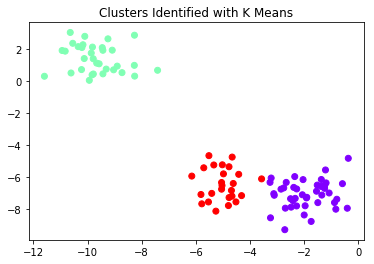

In [15]:
plt.scatter(dataClusters[0][:,0],dataClusters[0][:,1],c=kmeansModel.labels_,cmap='rainbow')
plt.title("Clusters Identified with K Means")

**Plotting the Original Clusterd**

Text(0.5,1,'Actual Clusters')

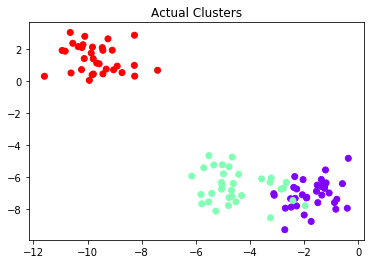

In [16]:
plt.scatter(dataClusters[0][:,0],dataClusters[0][:,1],c=dataClusters[1],cmap='rainbow')
plt.title("Actual Clusters")

subplot reference
https://matplotlib.org/examples/pylab_examples/subplot_demo.html

Text(0.5,1,'Actual Clusters')

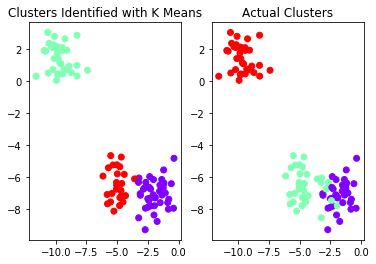

In [18]:
plt.subplot(1, 2, 1)
plt.scatter(dataClusters[0][:,0],dataClusters[0][:,1],c=kmeansModel.labels_,cmap='rainbow')
plt.title('Clusters Identified with K Means')


plt.subplot(1, 2, 2)
plt.scatter(dataClusters[0][:,0],dataClusters[0][:,1],c=dataClusters[1],cmap='rainbow')
plt.title("Actual Clusters")

**Don't compare colors. Colors are randomly assigned to the clusters.**